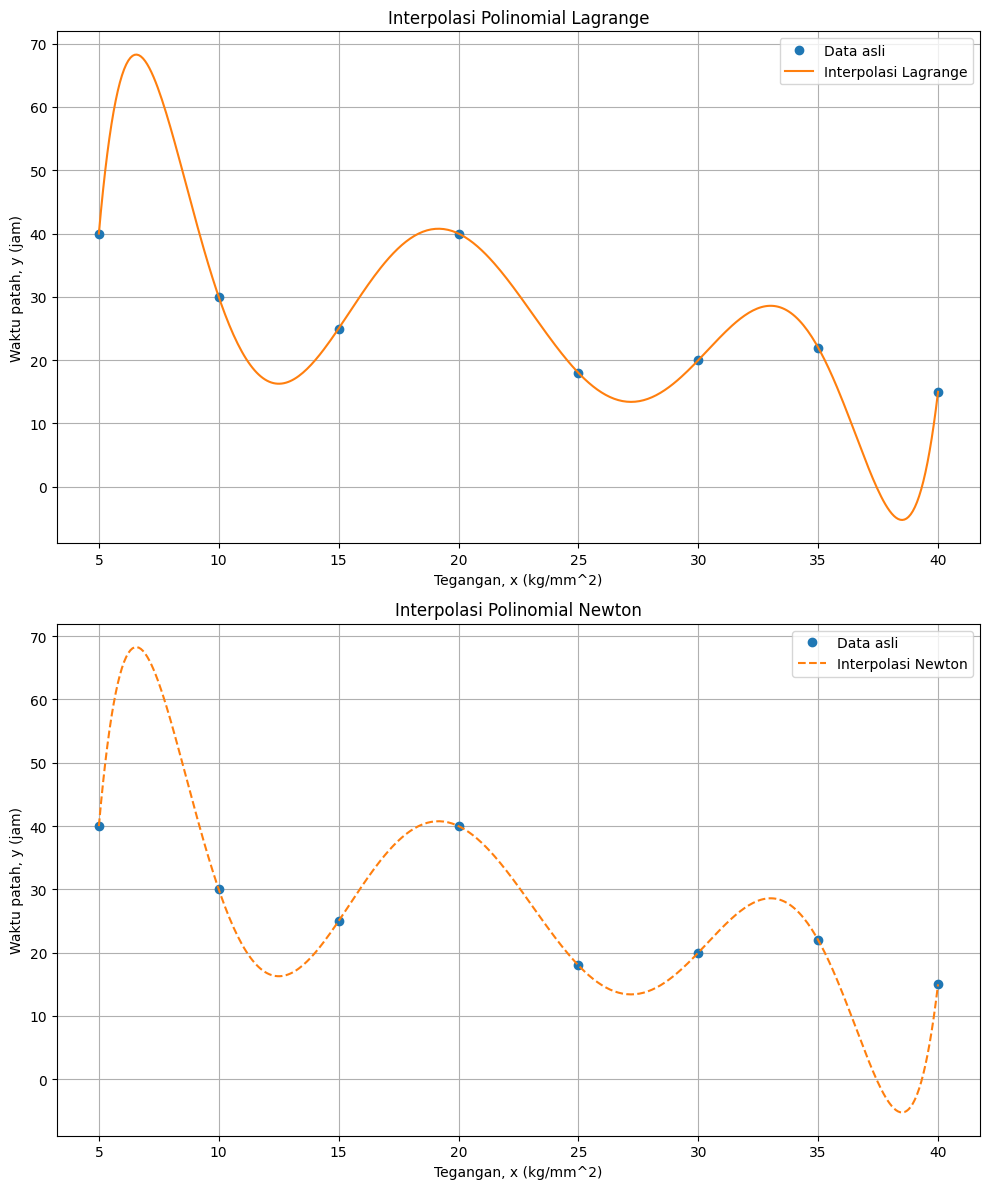

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#Raka Eldiansyah Putra
#21120122140150

# Data yang diberikan
x_data = np.array([5, 10, 15, 20, 25, 30, 35, 40])
y_data = np.array([40, 30, 25, 40, 18, 20, 22, 15])

# Fungsi interpolasi polinomial Lagrange
def lagrange_interpolation(x, y, x_interp):
    n = len(x)
    y_interp = 0
    for i in range(n):
        L = 1
        for j in range(n):
            if i != j:
                L *= (x_interp - x[j]) / (x[i] - x[j])
        y_interp += y[i] * L
    return y_interp

# Fungsi interpolasi polinomial Newton
def newton_interpolation(x, y, x_interp):
    n = len(x)
    divided_diff = np.zeros((n, n))
    divided_diff[:,0] = y

    for j in range(1, n):
        for i in range(n-j):
            divided_diff[i][j] = (divided_diff[i+1][j-1] - divided_diff[i][j-1]) / (x[i+j] - x[i])

    y_interp = divided_diff[0,0]
    product_terms = 1
    for i in range(1, n):
        product_terms *= (x_interp - x[i-1])
        y_interp += divided_diff[0,i] * product_terms
    return y_interp

# Rentang nilai x untuk plot
x_interp_values = np.linspace(5, 40, 400)

# Interpolasi menggunakan polinom Lagrange
y_lagrange_interp_values = [lagrange_interpolation(x_data, y_data, xi) for xi in x_interp_values]

# Interpolasi menggunakan polinom Newton
y_newton_interp_values = [newton_interpolation(x_data, y_data, xi) for xi in x_interp_values]

# Membuat plot
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot hasil interpolasi Lagrange
axs[0].plot(x_data, y_data, 'o', label='Data asli')
axs[0].plot(x_interp_values, y_lagrange_interp_values, '-', label='Interpolasi Lagrange')
axs[0].set_xlabel('Tegangan, x (kg/mm^2)')
axs[0].set_ylabel('Waktu patah, y (jam)')
axs[0].set_title('Interpolasi Polinomial Lagrange')
axs[0].legend()
axs[0].grid(True)

# Plot hasil interpolasi Newton
axs[1].plot(x_data, y_data, 'o', label='Data asli')
axs[1].plot(x_interp_values, y_newton_interp_values, '--', label='Interpolasi Newton')
axs[1].set_xlabel('Tegangan, x (kg/mm^2)')
axs[1].set_ylabel('Waktu patah, y (jam)')
axs[1].set_title('Interpolasi Polinomial Newton')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()
